In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [183]:
conn = sqlite3.connect('pm30image.db')

In [184]:
query = "SELECT * FROM image;"
all = pd.read_sql_query(query, conn)

In [185]:
all

,file_name,x,y,r,g,b,is_correct,deemed_correct
0,0,250,387,52,196,62,u,y
1,0,407,275,55,205,72,u,y
2,0,407,276,47,201,71,u,y
3,0,407,277,43,202,73,u,y
4,0,407,278,40,207,76,u,y
...,...,...,...,...,...,...,...,...
56239,994,663,176,32,197,103,u,y
56240,995,661,176,37,198,105,u,y
56241,995,662,176,38,197,104,u,y
56242,996,661,176,32,197,103,u,y


In [186]:
all.describe()

,x,y,r,g,b
count,56244.000000,56244.000000,56244.000000,56244.000000,56244.000000
mean,439.885766,274.087885,24.063136,233.802272,83.171325
std,42.559990,27.903542,15.940510,11.313632,10.310860
min,246.000000,167.000000,0.000000,196.000000,46.000000
25%,426.000000,262.000000,11.000000,230.000000,76.000000
50%,438.000000,277.000000,22.000000,235.000000,83.000000
75%,445.000000,288.000000,36.000000,240.000000,90.000000
max,672.000000,455.000000,55.000000,255.000000,106.000000


In [187]:
query = "SELECT x,y FROM image WHERE r=25 and g=226 and b=76 and file_name!='00';"
exact_query = pd.read_sql_query(query, conn)

In [188]:
exact_query

,x,y


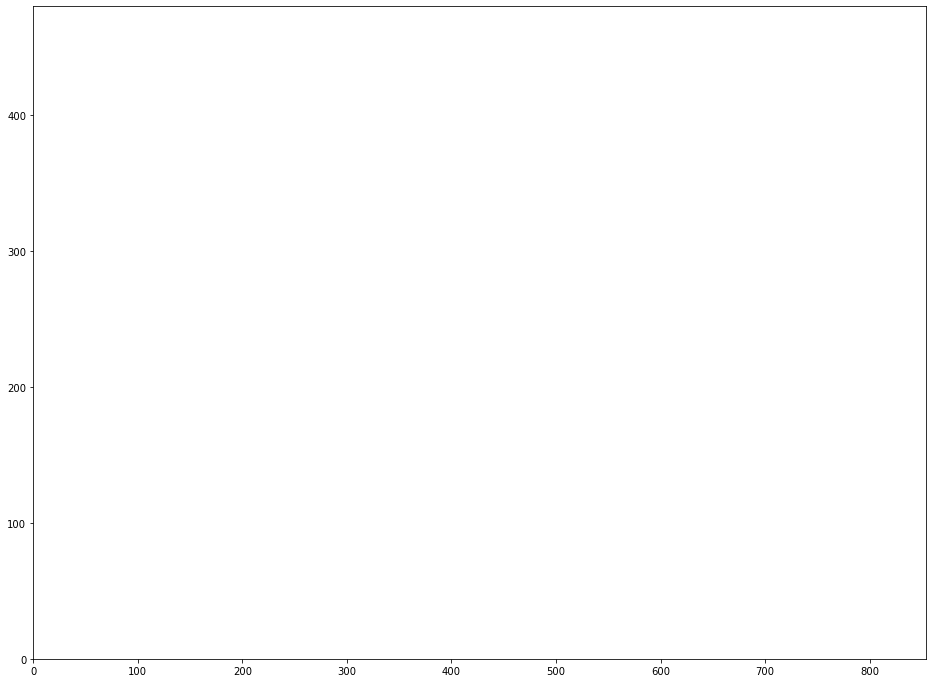

In [189]:
plt.figure(figsize=(16,12))
plt.scatter(exact_query['x'], exact_query['y'], s=1)
plt.xlim(0, 854)
plt.ylim(0, 480)
plt.show() 

<img src='frame5.jpg' width="1080" height="1920" align="left">

In [190]:
query = "SELECT x,y, file_name FROM image WHERE r=25 and g=226 and b=76 and file_name!='00' order by x, y, file_name;"
exact_trend = pd.read_sql_query(query, conn)

In [191]:
exact_trend

,x,y,file_name


In [192]:
query = "SELECT x,y FROM image WHERE deemed_correct='y' and cast(file_name as int)>0 and cast(file_name as int)<770 order by cast(file_name as int);"
algo_query = pd.read_sql_query(query, conn)

In [193]:
algo_query

,x,y
0,249,383
1,250,412
2,251,411
3,406,271
4,406,273
...,...,...
54439,463,455
54440,467,443
54441,463,454
54442,463,455


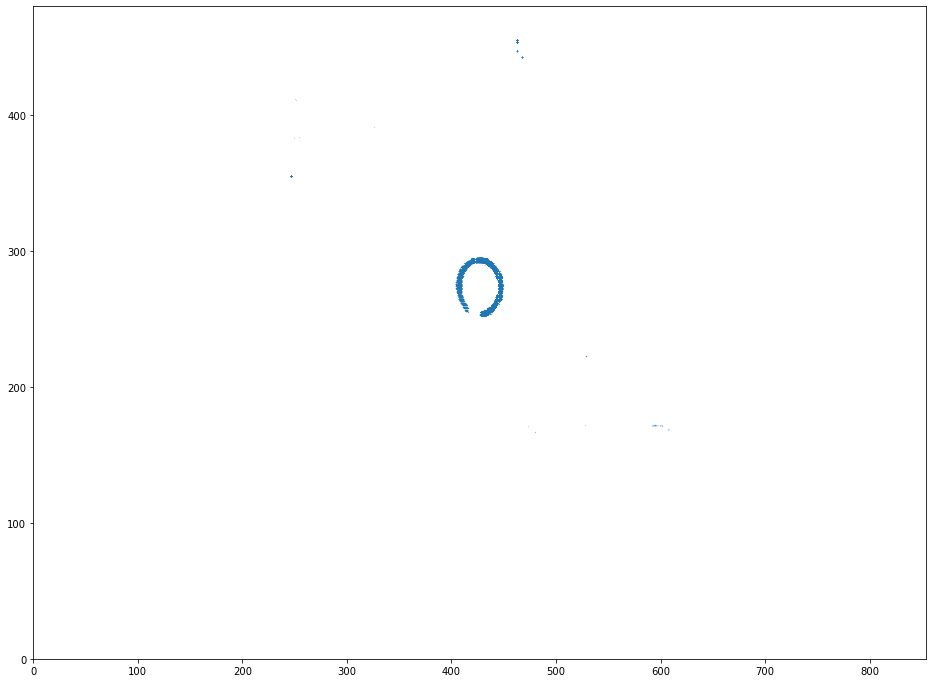

In [194]:
plt.figure(figsize=(16,12))
plt.scatter(algo_query['x'], algo_query['y'], s=0.01)
plt.xlim(0, 854)
plt.ylim(0, 480)
plt.show() 

<img src='frame5.jpg' width="1080" height="1920" align="left">